In [2]:

import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd
from os import listdir
import cv2
from tensorflow.keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import imutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import numpy as np
import pandas as pd


In [3]:
TRAINING_DIR = "observations-master\\experiements\\data"
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    batch_size=10, 
                                                    target_size=(150, 150),class_mode='binary')
# VALIDATION_DIR = "test"
# validation_datagen = ImageDataGenerator(rescale=1.0/255)

# validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
#                                                          batch_size=10, 
#                                                          target_size=(150, 150),
#                                                          class_mode='binary')


Found 1376 images belonging to 2 classes.


In [4]:
TRAINING_DIR = "train"
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=10,
                                                    target_size=(150, 150), class_mode='binary')
VALIDATION_DIR = "test"

test_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_generator = test_datagen.flow_from_directory(VALIDATION_DIR,
                                                    batch_size=10,
                                                    target_size=(150, 150), class_mode='binary')


Found 3254 images belonging to 3 classes.
Found 243 images belonging to 3 classes.


In [5]:
train_generator

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(100, (3, 3), activation='relu',
                           input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(100, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])


In [7]:
history = model.fit(train_generator,
                              epochs=30)

Epoch 1/30
 48/326 [===>..........................] - ETA: 24s - loss: -10841.1201 - acc: 0.7604

KeyboardInterrupt: 

import pandas as pd
pd.DataFrame(history.history).plot()


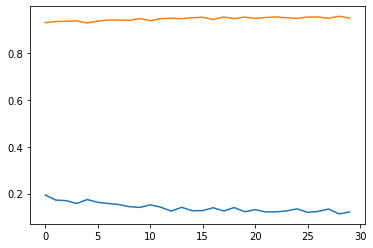

In [ ]:
plt.plot(pd.DataFrame(history.history))

In [ ]:
model.save('own_yes_no_comp.h5')

In [1]:
import tensorflow as tf
import numpy as np
import cv2
import pandas as pd
model=tf.keras.models.load_model('own_yes_no.h5')
class_labels=['with_mask ', 'withput_mask']
face_clsfr = cv2.CascadeClassifier(
    "C:\\Users\\jithi\\Downloads\\Face-Mask-Detection-master\\Face-Mask-Detection-master\\haarcascade_frontalface_default.xml")


In [3]:
labels_dict=class_labels
size=4
color_dict = {0: (0, 0, 255), 1: (0, 255, 0)}
classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
webcam = cv2.VideoCapture(0)  
while True:
    (rval, im) = webcam.read()
    im = cv2.flip(im, 1, 1) 
    mini = cv2.resize(im, (im.shape[1] // size, im.shape[0] // size))
    faces = classifier.detectMultiScale(mini)
    for f in faces:
        (x, y, w, h) = [v * size for v in f] 
        face_img = im[y:y+h, x:x+w]
        resized = cv2.resize(face_img, (150, 150))
        normalized = resized/255.0
        reshaped = np.reshape(normalized, (1, 150, 150, 3))
        reshaped = np.vstack([reshaped])
        result = model.predict(reshaped)
        print(result)

        label = int(np.round((result)[0][0]))

        cv2.rectangle(im, (x, y), (x+w, y+h),color_dict[label] ,2)
        cv2.rectangle(im, (x, y-40), (x+w, y), color_dict[label], - 1)
        cv2.putText(im, labels_dict[label], (x, y-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)

    cv2.imshow('LIVE',   im)
    key = cv2.waitKey(10)
    if key == 27:  
        break
webcam.release()
cv2.destroyAllWindows()


1/1 [==============================] - 5s 5s/step
[[0.7347082]]
1/1 [==============================] - 0s 28ms/step
[[0.73913115]]
1/1 [==============================] - 0s 25ms/step
[[0.73913115]]
1/1 [==============================] - 0s 22ms/step
[[0.7384055]]
1/1 [==============================] - 0s 23ms/step
[[0.7402315]]
1/1 [==============================] - 0s 25ms/step
[[0.7399074]]
1/1 [==============================] - 0s 22ms/step
[[0.73975325]]
1/1 [==============================] - 0s 21ms/step
[[0.73431975]]
1/1 [==============================] - 0s 21ms/step
[[0.7348991]]
1/1 [==============================] - 0s 24ms/step
[[0.7337598]]
1/1 [==============================] - 0s 21ms/step
[[0.7331496]]
1/1 [==============================] - 0s 22ms/step
[[0.7331496]]
1/1 [==============================] - 0s 20ms/step
[[0.731942]]
1/1 [==============================] - 0s 21ms/step
[[0.7346403]]
1/1 [==============================] - 0s 25ms/step
[[0.73190176]]
1/1 [===

In [ ]:
int(np.round(0.9-0.1))


1

In [1]:
import cv2
vid = cv2.VideoCapture(0)

while (True):
    ret, frame = vid.read()
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
vid.release()
cv2.destroyAllWindows()


In [ ]:
pathdir = "C:\\Users\\jithi\\OneDrive\\Desktop\\istockphoto-1215583521-170667a.jpg"

def local_loader_class(filename):
    import cv2
    import numpy
    from numpy import asarray
    img= cv2.imread(filename)
    img = asarray(img)
    img=tf.convert_to_tensor(img)
    img = tf.image.resize(img, size=[150, 150])
    img = tf.convert_to_tensor(img)
    img = tf.expand_dims(img, axis=0)
    img = img/255.
    return img

array=local_loader_class(pathdir)
array
pred=model.predict(array)
print(pred)
label = int(np.round(pred[0][0]))
class_labels[int(np.round(pred))]


1/1 [==============================] - 0s 33ms/step
[[0.7647212]]


'with_mask'